## 0. Классический импорт библиотек:

In [1]:
#Классический набор
import numpy as np
import pandas as pd

#Всякая графика
from matplotlib import pyplot as plt
import seaborn as sns

#Обработка данных
from sklearn.preprocessing import StandardScaler

#Всё для трансформации
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Нужная нам метрика и прикольчики для построения моделей
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

#Обычные классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#Классификаторы сложнее + ансамбль
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier

#Совсем крутые классификаторы
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
# игнорируем ошибки
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Читаем файл и смотрим на него:

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,Unnamed: 0,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,0,56.0,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,56.0,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,946.0,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
3,3,945.0,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
4,4,947.0,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  200000 non-null  int64  
 1   site1       200000 non-null  float64
 2   time1       200000 non-null  object 
 3   site2       197545 non-null  float64
 4   time2       197545 non-null  object 
 5   site3       195182 non-null  float64
 6   time3       195182 non-null  object 
 7   site4       193138 non-null  float64
 8   time4       193138 non-null  object 
 9   site5       191197 non-null  float64
 10  time5       191197 non-null  object 
 11  site6       189349 non-null  float64
 12  time6       189349 non-null  object 
 13  site7       187604 non-null  float64
 14  time7       187604 non-null  object 
 15  site8       185929 non-null  float64
 16  time8       185929 non-null  object 
 17  site9       184211 non-null  float64
 18  time9       184211 non-null  object 
 19  si

ID сайта - должно быть целое число. Но лично меня раздражает, что id сайта лежит в формате float64, когда по-хорошему надо int. А вот дата посещения сайта лежит в формате object, но ведь это дата. Это совсем не то, что нам нужно, поэтому надо поменять формат, чтобы далее было проще выдумывать признаки.

Однако перед тем как это делать. Наверное стоит посмотреть и на тестовые данные:

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50000 non-null  int64  
 1   site1       50000 non-null  float64
 2   time1       50000 non-null  object 
 3   site2       49121 non-null  float64
 4   time2       49121 non-null  object 
 5   site3       48399 non-null  float64
 6   time3       48399 non-null  object 
 7   site4       47899 non-null  float64
 8   time4       47899 non-null  object 
 9   site5       47396 non-null  float64
 10  time5       47396 non-null  object 
 11  site6       46946 non-null  float64
 12  time6       46946 non-null  object 
 13  site7       46535 non-null  float64
 14  time7       46535 non-null  object 
 15  site8       46170 non-null  float64
 16  time8       46170 non-null  object 
 17  site9       45776 non-null  float64
 18  time9       45776 non-null  object 
 19  site10      45377 non-nul

Здесь уже (очевидно) нет таргета и наблюдений меньше (50 000). Структура дока та же. Проблемы те же. Ага. Так как работать надо сразу с двумя выборками. То и преобразовывать их будем вместе. Так как далее необходимо будет стряпать новые признаки, то будем сразу разделять их на две категории. Новые признаки на основе посещенных сайтов и новые признаки на основе времени. К тому же колонки удобно названы. Начнём решать пробелему с датами:

In [7]:
#Преобразуем в формат даты:
times = ['time%s' % i for i in range(1, 11)]
df_train[times] = df_train[times].apply(pd.to_datetime)
df_test[times] = df_test[times].apply(pd.to_datetime)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  200000 non-null  int64         
 1   site1       200000 non-null  float64       
 2   time1       200000 non-null  datetime64[ns]
 3   site2       197545 non-null  float64       
 4   time2       197545 non-null  datetime64[ns]
 5   site3       195182 non-null  float64       
 6   time3       195182 non-null  datetime64[ns]
 7   site4       193138 non-null  float64       
 8   time4       193138 non-null  datetime64[ns]
 9   site5       191197 non-null  float64       
 10  time5       191197 non-null  datetime64[ns]
 11  site6       189349 non-null  float64       
 12  time6       189349 non-null  datetime64[ns]
 13  site7       187604 non-null  float64       
 14  time7       187604 non-null  datetime64[ns]
 15  site8       185929 non-null  float64       
 16  ti

Так-то лучше. Далее у нас осталась проблема пропусков. Самое банальное решение - заполнить всё нулями.

In [8]:
#Изменим формат сайтов. Заполним все пропуски нулями:
sites = ['site%s' % i for i in range(1, 11)]
df_train[sites] = df_train[sites].fillna(0).astype('int')
df_test[sites] = df_test[sites].fillna(0).astype('int')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  200000 non-null  int64         
 1   site1       200000 non-null  int32         
 2   time1       200000 non-null  datetime64[ns]
 3   site2       200000 non-null  int32         
 4   time2       197545 non-null  datetime64[ns]
 5   site3       200000 non-null  int32         
 6   time3       195182 non-null  datetime64[ns]
 7   site4       200000 non-null  int32         
 8   time4       193138 non-null  datetime64[ns]
 9   site5       200000 non-null  int32         
 10  time5       191197 non-null  datetime64[ns]
 11  site6       200000 non-null  int32         
 12  time6       189349 non-null  datetime64[ns]
 13  site7       200000 non-null  int32         
 14  time7       187604 non-null  datetime64[ns]
 15  site8       200000 non-null  int32         
 16  ti

Теперь мы можем приступить к созданию новых признаков, так как формат данных адекватен.

In [9]:
#Выделяем таргет в обучающей выборке
y_train = df_train['target']
#Создаём общий датафрейм
full_df = pd.concat([df_train.drop('target', axis=1), df_test])
full_df.index = [i for i in range(len(full_df))]
#Запоминаем индекс разделения обучающей и тестовой выборки
idx_split = df_train.shape[0]

Прочитаем файл с сайтами. Чтобы было.

In [10]:
pkl_file = open('sites.pkl', 'rb')
sites_decryption = pickle.load(pkl_file)
sorted(sites_decryption.items(), key=lambda x: x[1])

[('fpdownload2.macromedia.com', 1),
 ('hotmail.fr', 2),
 ('login.live.com', 3),
 ('mail.live.com', 4),
 ('dub122.mail.live.com', 5),
 ('people.directory.live.com', 6),
 ('secure.shared.live.com', 7),
 ('windowslive.tt.omtrdc.net', 8),
 ('cid-1bed360223325286.users.storage.live.com', 9),
 ('js.live.net', 10),
 ('go.trouter.io', 11),
 ('storage.live.com', 12),
 ('blufiles.storage.msn.com', 13),
 ('h.live.com', 14),
 ('prod.registrar.skype.com', 15),
 ('api.skype.com', 16),
 ('proxy-bay-people.directory.live.com', 17),
 ('p.sfx.ms', 18),
 ('dub122.afx.ms', 19),
 ('google.fr', 20),
 ('www.google.fr', 21),
 ('apis.google.com', 22),
 ('www.google.com', 23),
 ('lipsakiss.free.fr', 24),
 ('www.shotgun2013.fr', 25),
 ('ba.commentcamarche.net', 26),
 ('www.commentcamarche.net', 27),
 ('static.commentcamarche.net', 28),
 ('www.facebook.com', 29),
 ('platform.twitter.com', 30),
 ('static.ccm2.net', 31),
 ('connect.facebook.net', 32),
 ('static.ak.facebook.com', 33),
 ('r.ccm2.net', 34),
 ('s-stati

## 2. Создаём новые признаки:

In [11]:
features = pd.DataFrame(index=full_df.index)

Сначала рассмотрим признаки, которые можно получить из посещенных сайтов

Смотрим популярные сайты для Нео (отбираем по популярности посещений, в список забираем те сайты, которые имеют более 500 посещений):

In [12]:
top_sites_Neo = pd.Series(
    df_train[df_train.target==1][sites]
    .values
    .flatten()
).value_counts().sort_values(ascending=False)

Neo = top_sites_Neo[top_sites_Neo >= 500].index

Популярные сайты для обычных пользователей (отбираем столько же сайтов, сколько было отобрано для Нео):

In [13]:
top_sites_User = pd.Series(
    df_train[df_train.target==0][sites]
    .values
    .flatten()
).value_counts().sort_values(ascending=False)

users = top_sites_User[:len(Neo)]

Убираем сайты, которые повторяются в том и другом списке:

In [14]:
Neo_sites = [i for i in Neo if i not in users]
users_sites = [i for i in users if i not in Neo]

Создаём другие признаки на основе сайтов:

In [15]:
features['number of sites'] = full_df[sites].astype(bool).sum(axis=1) # всего сайтов в сессии
features['unique sites'] = full_df[sites].nunique(axis=1).values-np.any(np.isin(full_df[sites], 0), axis=1).astype(np.int8) # уникальные сайты в сессии
features['count of Neo sites'] = full_df[sites].isin(Neo_sites).astype(np.int32).sum(axis=1)
features['count of User sites'] = full_df[sites].isin(users_sites).astype(np.int32).sum(axis=1)

Теперь посмотрим на время.

Создадим вспомогательный датасет для нахождения минимального и максимального времени, проведенного на сайте

In [16]:
f = pd.DataFrame(index=full_df.index)
f['dif2_1'] = [i.seconds for i in full_df[times]['time2'] - full_df[times]['time1']]
f['dif3_2'] = [i.seconds for i in full_df[times]['time3'] - full_df[times]['time2']]
f['dif4_3'] = [i.seconds for i in full_df[times]['time4'] - full_df[times]['time3']]
f['dif5_4'] = [i.seconds for i in full_df[times]['time5'] - full_df[times]['time4']]
f['dif6_5'] = [i.seconds for i in full_df[times]['time6'] - full_df[times]['time5']]
f['dif7_6'] = [i.seconds for i in full_df[times]['time7'] - full_df[times]['time6']]
f['dif8_7'] = [i.seconds for i in full_df[times]['time8'] - full_df[times]['time7']]
f['dif9_8'] = [i.seconds for i in full_df[times]['time9'] - full_df[times]['time8']]
f['dif10_9'] = [i.seconds for i in full_df[times]['time10'] - full_df[times]['time9']]
f['min time'] = f.min(axis=1)
f['max time'] = f.max(axis=1)

Признаки, полученные из времени посещения сайтов:

In [17]:
features['start hour'] = [i.hour for i in full_df['time1']] # час начала сессии
features['start day'] = [i.timetuple().tm_yday for i in full_df['time1']] # день года начала сессии
features['start weekday'] = [i.isoweekday() for i in full_df['time1']] # день недели начала сессии
features['start month'] = [i.month for i in full_df['time1']] # месяц начала сессии
features['start morning'] = [int(5 <= i <= 11) for i in features['start hour']] # сессия началась утром
features['start afternoon'] = [int(12 <= i <= 16) for i in features['start hour']] # сессия началась днем
features['start evening'] = [int(17 <= i <= 23) for i in features['start hour']] # сессия началась вечером
features['start night'] = [int(0 <= i <= 4) for i in features['start hour']] # сессия началась ночью

features['weekend'] = [int(i > 5) for i in features['start weekday']] # выходной (1) или будний (0) день

features['end hour'] = [i.hour for i in full_df[times].max(axis=1)] # час окончания сессии
features['end morning'] = [int(5 <= i <= 11) for i in features['end hour']] # сессия закончилась утром
features['end afternoon'] = [int(12 <= i <= 16) for i in features['end hour']] # сессия закончилась днем
features['end evening'] = [int(17 <= i <= 23) for i in features['end hour']] # сессия закончилась вечером
features['end night'] = [int(0 <= i <= 4) for i in features['end hour']] # сессия закончилась ночью

features['duration'] =  [np.log1p(i.seconds) for i in full_df[times].max(axis=1) - full_df[times].min(axis=1)] # продолжительность сессии (секунды), логарифмируем
features['min time'] = np.log1p(f['min time'])
features['max time'] = np.log1p(f['max time'])

Исходя из уже созданных признаков, добавим среднее время, проведенное на одном сайте

In [18]:
features['time site'] = features['duration'] / features['number of sites']

Полученный датасет с новыми признаками выглядит следующим образом:

In [19]:
features 

,number of sites,unique sites,count of Neo sites,count of User sites,start hour,start day,start weekday,start month,start morning,start afternoon,...,weekend,end hour,end morning,end afternoon,end evening,end night,duration,min time,max time,time site
0,2,2,0,0,8,12,6,1,1,0,...,1,8,1,0,0,0,0.000000,0.0,0.000000,0.000000
1,4,2,0,0,8,12,6,1,1,0,...,1,9,1,0,0,0,7.488294,0.0,7.487174,1.872073
2,10,6,0,0,8,12,6,1,1,0,...,1,8,1,0,0,0,1.609438,0.0,0.693147,0.160944
3,10,5,0,0,8,12,6,1,1,0,...,1,8,1,0,0,0,1.386294,0.0,0.693147,0.138629
4,10,6,0,0,8,12,6,1,1,0,...,1,8,1,0,0,0,1.098612,0.0,0.693147,0.109861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,10,6,0,0,18,114,4,4,0,0,...,0,18,0,0,1,0,4.077537,0.0,3.713572,0.407754
249996,10,5,0,0,18,114,4,4,0,0,...,0,18,0,0,1,0,3.737670,0.0,3.367296,0.373767
249997,10,8,0,0,18,114,4,4,0,0,...,0,18,0,0,1,0,2.397895,0.0,1.609438,0.239790
249998,2,2,0,0,18,114,4,4,0,0,...,0,18,0,0,1,0,0.000000,0.0,0.000000,0.000000


Таким образом, на данном этапе имеем 22 новых признака. Многовато.

## 3. Визуализация

Выделим из датасета с признаками обучающую выборку

In [20]:
train_features = features.iloc[:idx_split].copy()
train_features['target'] = y_train
train_features

,number of sites,unique sites,count of Neo sites,count of User sites,start hour,start day,start weekday,start month,start morning,start afternoon,...,end hour,end morning,end afternoon,end evening,end night,duration,min time,max time,time site,target
0,2,2,0,0,8,12,6,1,1,0,...,8,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0
1,4,2,0,0,8,12,6,1,1,0,...,9,1,0,0,0,7.488294,0.000000,7.487174,1.872073,0
2,10,6,0,0,8,12,6,1,1,0,...,8,1,0,0,0,1.609438,0.000000,0.693147,0.160944,0
3,10,5,0,0,8,12,6,1,1,0,...,8,1,0,0,0,1.386294,0.000000,0.693147,0.138629,0
4,10,6,0,0,8,12,6,1,1,0,...,8,1,0,0,0,1.098612,0.000000,0.693147,0.109861,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,10,9,1,0,9,84,2,3,1,0,...,9,1,0,0,0,0.693147,0.000000,0.693147,0.069315,0
199996,10,8,1,0,9,84,2,3,1,0,...,9,1,0,0,0,1.386294,0.000000,0.693147,0.138629,0
199997,10,8,1,0,9,84,2,3,1,0,...,9,1,0,0,0,2.564949,0.000000,2.397895,0.256495,0
199998,10,1,0,0,9,84,2,3,1,0,...,9,1,0,0,0,4.934474,2.564949,2.944439,0.493447,0


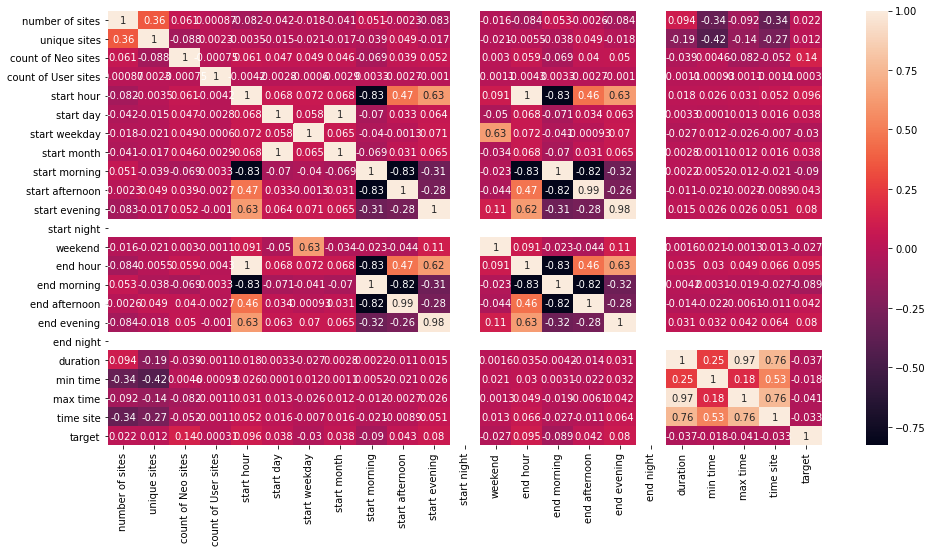

In [21]:
plt.figure(figsize = (16, 8))
sns.heatmap(train_features.corr(), annot=True);

Как видно из матрицы корреляции, признаки на основе времени, которые содержат в себе данные о ночи, бесполезны, так как ни с каким другим признаком не коррелируют. Их необходимо исключить из рассмотрения. 

Визуализируем отличия между Нео и обычными пользователями. Определим признаки, которые не несут много пользы.

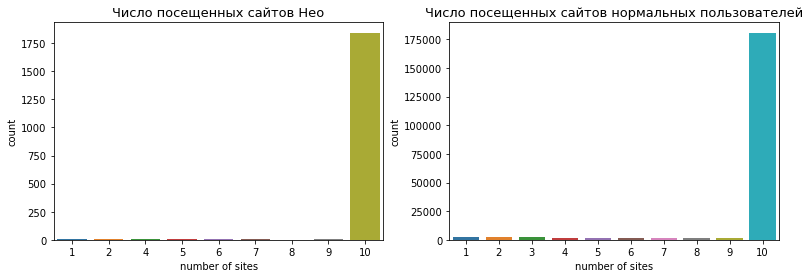

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

sns.countplot(x='number of sites', data=train_features[train_features['target']==1], ax=ax[0])
ax[0].set_title('Число посещенных сайтов Нео', fontsize=13)

sns.countplot(x='number of sites', data=train_features[train_features['target']==0], ax=ax[1])
ax[1].set_title('Число посещенных сайтов нормальных пользователей', fontsize=13);

Признак не особо полезен.

Рассмотрим, сколько уникальных сайтов за сессию обычно посещает Нео и обычные пользователи:

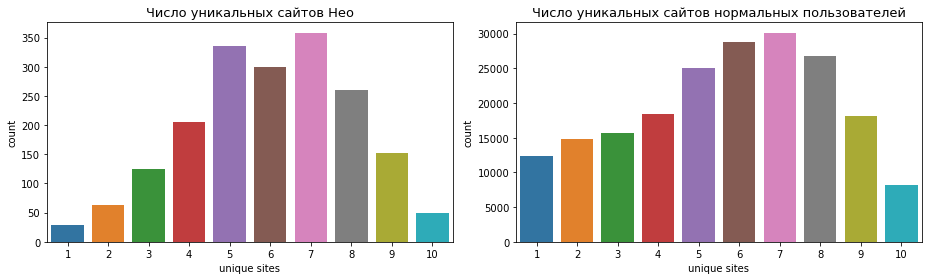

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

sns.countplot(x='unique sites', data=train_features[train_features['target']==1], ax=ax[0])
ax[0].set_title('Число уникальных сайтов Нео', fontsize=13)

sns.countplot(x='unique sites', data=train_features[train_features['target']==0], ax=ax[1])
ax[1].set_title('Число уникальных сайтов нормальных пользователей', fontsize=13)

plt.tight_layout()

Некие отличия есть.

Рассмотрим отличия в активности пользователей в будни и выходные дни:

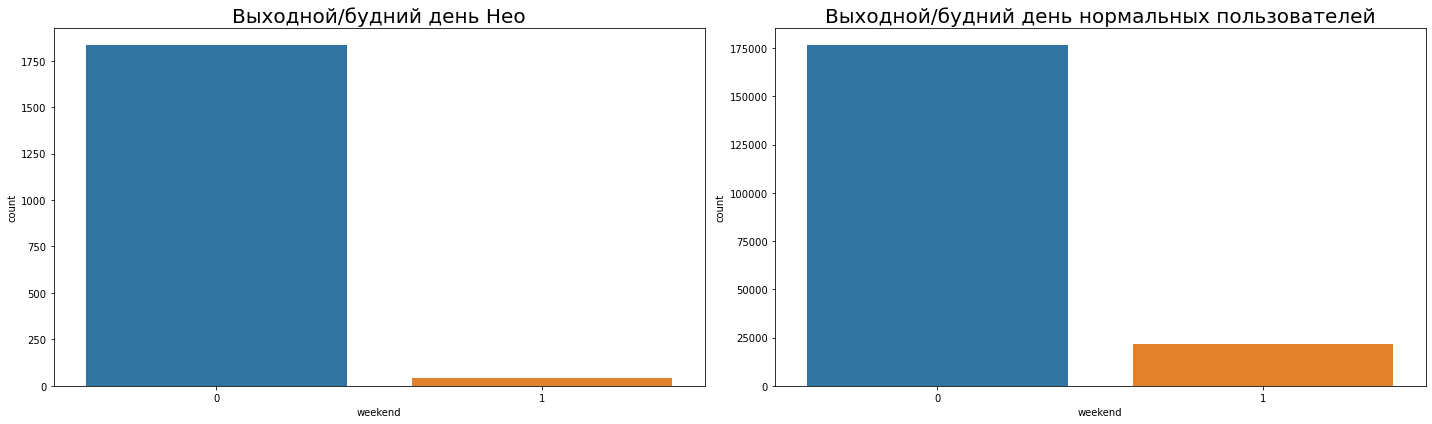

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='weekend', data=train_features[train_features['target']==1], ax=ax[0])
ax[0].set_title('Выходной/будний день Нео', fontsize=20)

sns.countplot(x='weekend', data=train_features[train_features['target']==0], ax=ax[1])
ax[1].set_title('Выходной/будний день нормальных пользователей', fontsize=20)

plt.tight_layout()

Как видно, данный признак не информативен.

Посмотрим, в какие дни года Нео был активен:

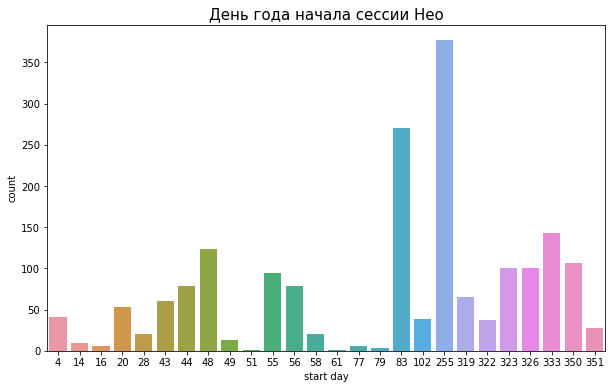

In [25]:
plt.figure(figsize = (10, 6))

sns.countplot(x='start day', data=train_features[train_features['target']==1])
plt.title('День года начала сессии Нео', fontsize=15);

В какие дни года были активны обычные пользователи:

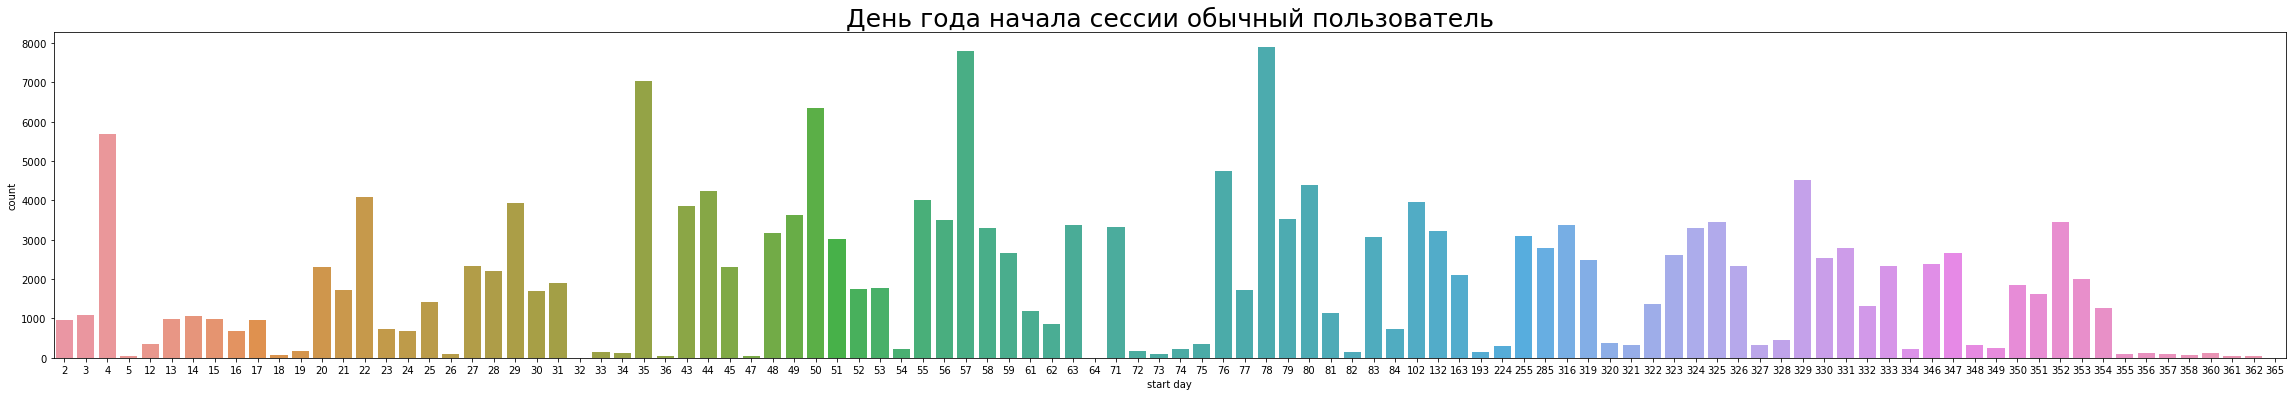

In [26]:
plt.figure(figsize = (40, 6))

sns.countplot(x='start day', data=train_features[train_features['target']==0])
plt.title('День года начала сессии обычный пользователь', fontsize=25);

Рассмотрим, есть ли отличия в часе начала сессии у обычных пользователей и у Нео:

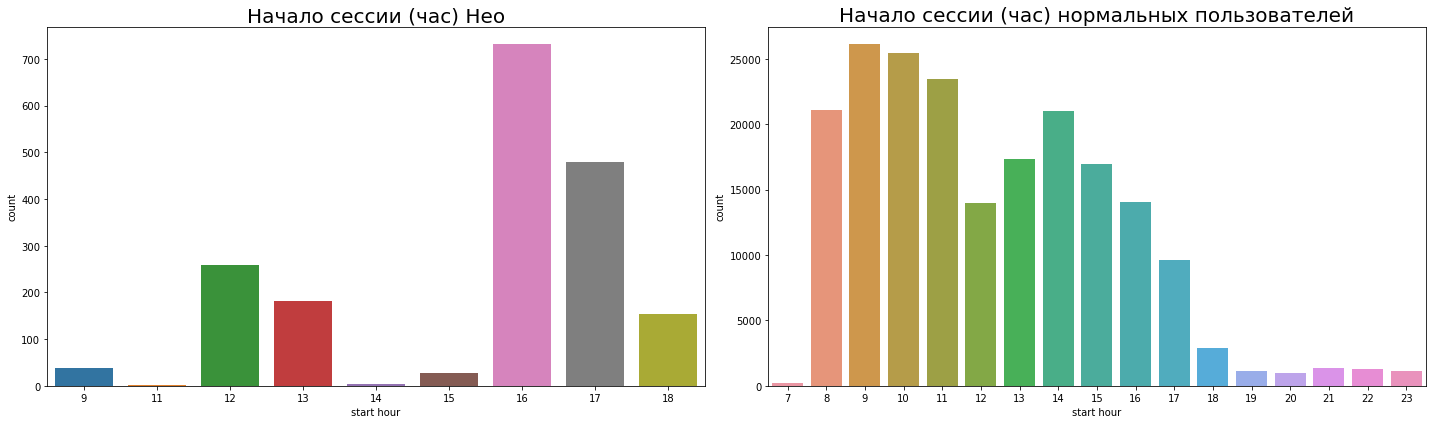

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='start hour', data=train_features[train_features['target']==1], ax=ax[0])
ax[0].set_title('Начало сессии (час) Нео', fontsize=20)

sns.countplot(x='start hour', data=train_features[train_features['target']==0], ax=ax[1])
ax[1].set_title('Начало сессии (час) нормальных пользователей', fontsize=20)

plt.tight_layout()

Отличия есть. Так, Нео преимущественно "спит" по утрам (нет активностей в 7 и 8 часов). И предпочитает заходить в сеть в 16 часов. При этом не сидит в сети по вечерам (позднее 18 часов активностей нет). В то время как обычные пользователи посещают сайты преимущественно утром.

Рассмотрим признак, основанный на времени окончания интернет-сессии:

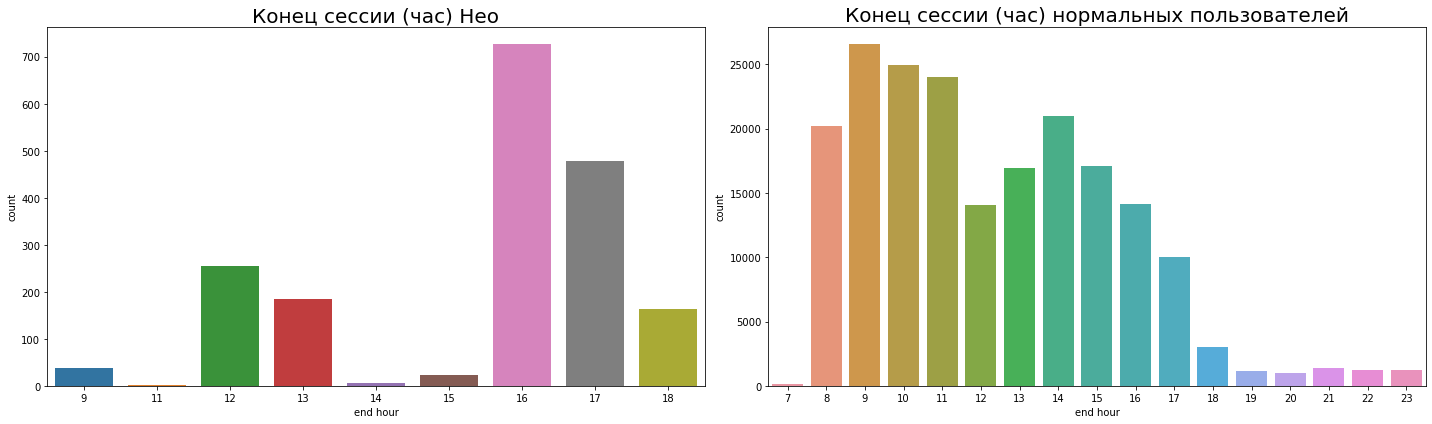

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='end hour', data=train_features[train_features['target']==1], ax=ax[0])
ax[0].set_title('Конец сессии (час) Нео', fontsize=20)

sns.countplot(x='end hour', data=train_features[train_features['target']==0], ax=ax[1])
ax[1].set_title('Конец сессии (час) нормальных пользователей', fontsize=20)

plt.tight_layout()

Очевидно, один из признаков (например, час окончания сессии) можно убрать. Исходя из этого, признаки категорий времени (утро, день, вечер, ночь) для окончания сессии также не нужны.

Рассмотрим начало сессии в днях недели:

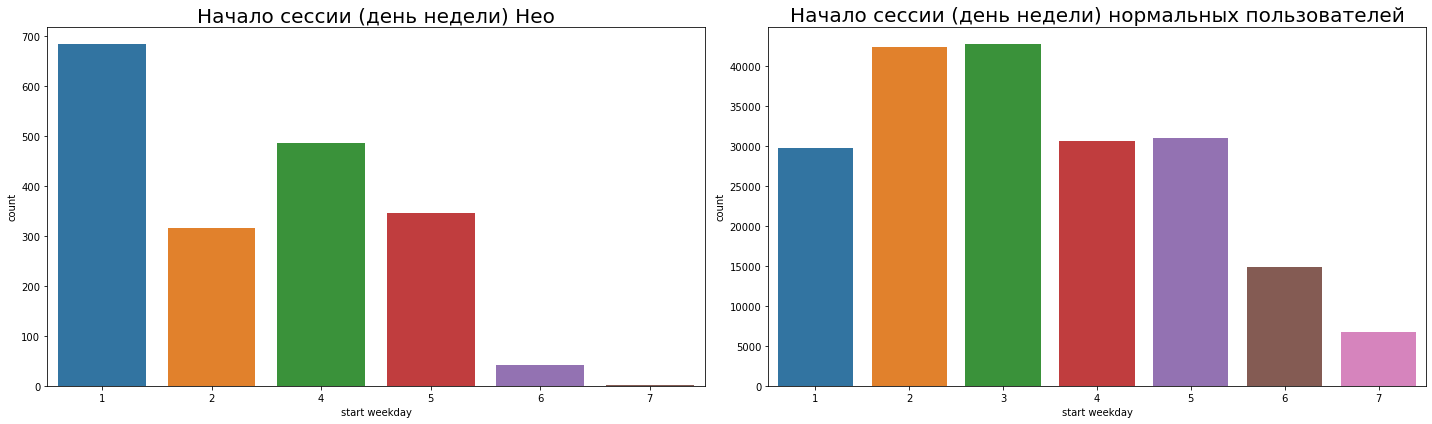

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='start weekday', data=train_features[train_features['target']==1], ax=ax[0])
ax[0].set_title('Начало сессии (день недели) Нео', fontsize=20)

sns.countplot(x='start weekday', data=train_features[train_features['target']==0], ax=ax[1])
ax[1].set_title('Начало сессии (день недели) нормальных пользователей', fontsize=20)

plt.tight_layout()

Мы можем заметить, что Нео предпочитает заходить в сеть по понедельникам и почти не заходит в воскресенье, в то время как обычные пользователи чаще заходят в сеть во вторник и среду (в среду Нео не заходит совсем).

Теперь рассмотрим в разрезе месяца в году:

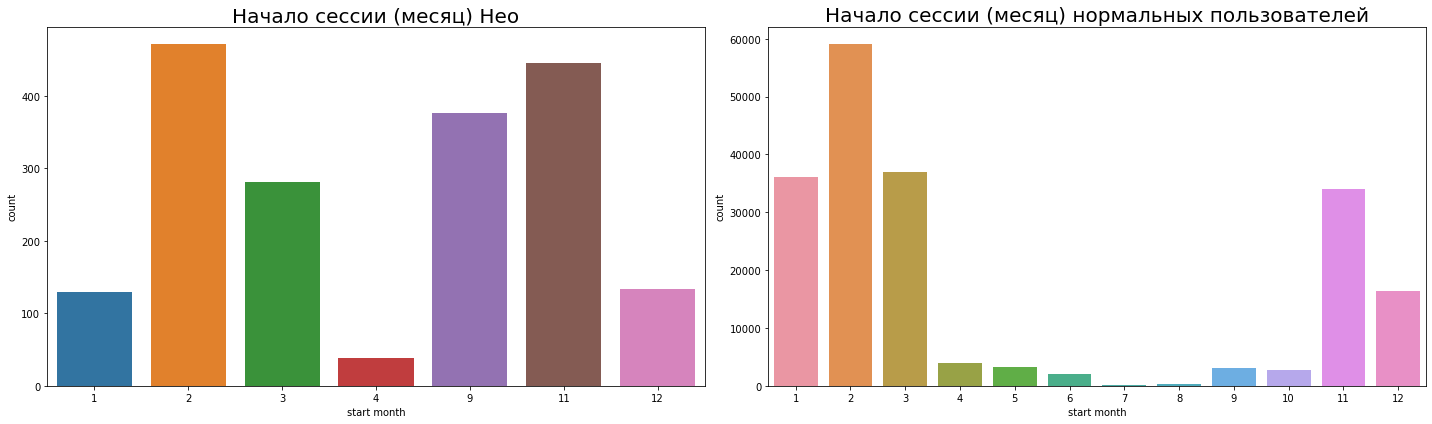

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='start month', data=train_features[train_features['target']==1], ax=ax[0])
ax[0].set_title('Начало сессии (месяц) Нео', fontsize=20)

sns.countplot(x='start month', data=train_features[train_features['target']==0], ax=ax[1])
ax[1].set_title('Начало сессии (месяц) нормальных пользователей', fontsize=20)

plt.tight_layout()

Нео и обычные пользователи обычно заходят в сеть чаще всего в феврале и ноябре (прикольно). Однако обычные пользователи чаще заходят в январе и марте, в отличие от Нео. А Нео чаще заходит в сентябре.

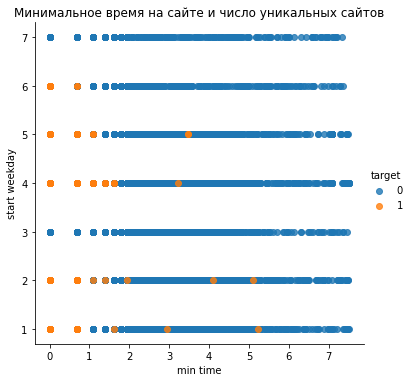

In [31]:
sns.lmplot('min time', 'start weekday', data=train_features, hue='target', fit_reg=False);
plt.title('Минимальное время на сайте и число уникальных сайтов');

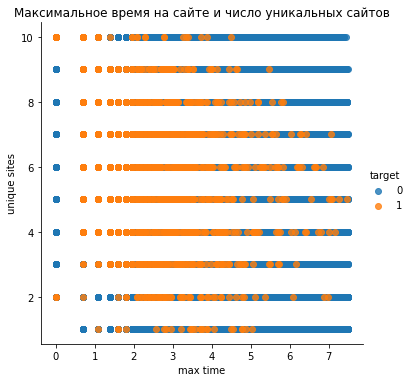

In [32]:
sns.lmplot('max time', 'unique sites', data=train_features, hue='target', fit_reg=False);
plt.title('Максимальное время на сайте и число уникальных сайтов');

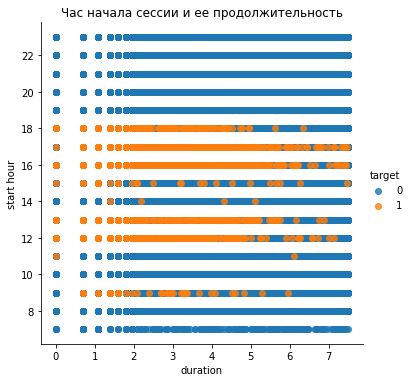

In [33]:
sns.lmplot('duration', 'start hour', data=train_features, hue='target', fit_reg=False);
plt.title('Час начала сессии и ее продолжительность');

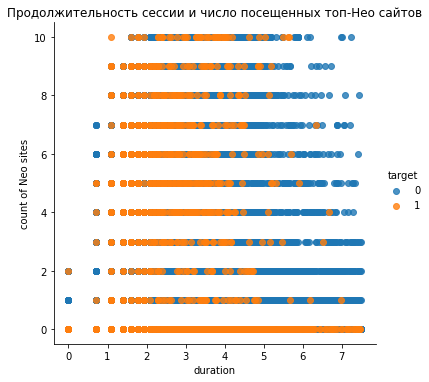

In [34]:
sns.lmplot('duration', 'count of Neo sites', data=train_features, hue='target', fit_reg=False);
plt.title('Продолжительность сессии и число посещенных топ-Нео сайтов');

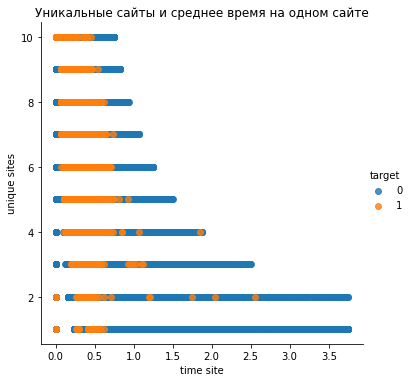

In [35]:
sns.lmplot('time site', 'unique sites', data=train_features, hue='target', fit_reg=False)
plt.title('Уникальные сайты и среднее время на одном сайте');

Удаляем признаки, признанные неинформативными.

In [36]:
delete_cols = ['number of sites', 'weekend', 'end hour', 'end morning', 'end afternoon', 'end evening', 'end night', 'start night']
features = features.drop(delete_cols, axis=1)
train_features = train_features.drop(delete_cols, axis=1)

train_features['min time'] = train_features['min time'].fillna(0).astype('int')
train_features['max time'] = train_features['max time'].fillna(0).astype('int')

features

,unique sites,count of Neo sites,count of User sites,start hour,start day,start weekday,start month,start morning,start afternoon,start evening,duration,min time,max time,time site
0,2,0,0,8,12,6,1,1,0,0,0.000000,0.0,0.000000,0.000000
1,2,0,0,8,12,6,1,1,0,0,7.488294,0.0,7.487174,1.872073
2,6,0,0,8,12,6,1,1,0,0,1.609438,0.0,0.693147,0.160944
3,5,0,0,8,12,6,1,1,0,0,1.386294,0.0,0.693147,0.138629
4,6,0,0,8,12,6,1,1,0,0,1.098612,0.0,0.693147,0.109861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6,0,0,18,114,4,4,0,0,1,4.077537,0.0,3.713572,0.407754
249996,5,0,0,18,114,4,4,0,0,1,3.737670,0.0,3.367296,0.373767
249997,8,0,0,18,114,4,4,0,0,1,2.397895,0.0,1.609438,0.239790
249998,2,0,0,18,114,4,4,0,0,1,0.000000,0.0,0.000000,0.000000


## 4. Немного обработки

Итого, имеем 14 новорождённых признаков. С ними и будем работать. Разделим обучающую выборку. И для начала необходимо стандартизировать данные.

In [37]:
train_features

,unique sites,count of Neo sites,count of User sites,start hour,start day,start weekday,start month,start morning,start afternoon,start evening,duration,min time,max time,time site,target
0,2,0,0,8,12,6,1,1,0,0,0.000000,0,0,0.000000,0
1,2,0,0,8,12,6,1,1,0,0,7.488294,0,7,1.872073,0
2,6,0,0,8,12,6,1,1,0,0,1.609438,0,0,0.160944,0
3,5,0,0,8,12,6,1,1,0,0,1.386294,0,0,0.138629,0
4,6,0,0,8,12,6,1,1,0,0,1.098612,0,0,0.109861,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,9,1,0,9,84,2,3,1,0,0,0.693147,0,0,0.069315,0
199996,8,1,0,9,84,2,3,1,0,0,1.386294,0,0,0.138629,0
199997,8,1,0,9,84,2,3,1,0,0,2.564949,0,2,0.256495,0
199998,1,0,0,9,84,2,3,1,0,0,4.934474,2,2,0.493447,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    train_features.drop('target', axis=1), train_features['target'],
    test_size=0.2,
    stratify=train_features['target'],
    random_state=22)

In [39]:
X_train

,unique sites,count of Neo sites,count of User sites,start hour,start day,start weekday,start month,start morning,start afternoon,start evening,duration,min time,max time,time site
186663,7,0,0,18,78,3,3,0,0,1,1.945910,0,1,0.194591
136162,1,0,0,11,50,3,2,1,0,0,0.000000,0,0,0.000000
110538,4,0,0,22,31,5,1,0,0,1,4.143135,0,3,0.414313
46678,8,0,0,11,329,1,11,1,0,0,1.098612,0,0,0.109861
197114,9,0,0,11,83,1,3,1,0,0,2.397895,0,1,0.239790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87037,4,0,0,14,17,5,1,0,1,0,3.637586,0,2,0.363759
10872,6,0,0,14,102,5,4,0,1,0,6.373320,0,5,0.637332
30376,5,0,0,8,322,1,11,1,0,0,4.418841,0,4,0.441884
174280,2,0,0,11,76,1,3,1,0,0,5.288267,0,3,0.528827


In [40]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## 5. Построение моделей

Начнём с Логистической регрессии:

In [42]:
lr = LogisticRegression().fit(X_train, y_train)

In [43]:
cv = KFold(n_splits=6, shuffle=True, random_state=22)

cv_scores = cross_val_score(lr, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.86196291 0.8655486  0.86756286 0.86754838 0.8671112  0.86099245] 0.865121066747622


In [44]:
param_grid ={'C': np.arange(0, 1, 0.1),
            'max_iter': np.arange(100,1000,100),
            'class_weight':['None','balanced']}

grid_logit = GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc',
                          n_jobs=-1, verbose=True) 
grid_logit.fit(X_train, y_train)

Fitting 6 folds for each of 180 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.5min finished


GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'class_weight': ['None', 'balanced'],
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
             scoring='roc_auc', verbose=True)

In [45]:
print(grid_logit.best_params_, grid_logit.best_score_)

{'C': 0.8, 'class_weight': 'balanced', 'max_iter': 100} 0.8699377386830953


In [46]:
lr_opt = LogisticRegression(random_state=22, **grid_logit.best_params_).fit(X_train, y_train)

In [103]:
cv_scores = cross_val_score(lr_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.86753724 0.87212794 0.87050673 0.87814751 0.86996181 0.8613452 ] 0.8699377386830953


In [100]:
y_pred = lr.predict(X_test)

In [104]:
cv_scores = cross_val_score(lr_opt, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.87589658 0.85430884 0.88118215 0.8363306  0.89850423 0.84207195] 0.8647157254525023


Ну неплохо, может получится достать лучше нужную нам метрику качества.

* Метод опорных векторов:

In [43]:
svm = SVC().fit(X_train, y_train)

In [44]:
cv_scores = cross_val_score(svm, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.91958521 0.92532197 0.91078108 0.91484376 0.91861119 0.91767815] 0.9178035614930358


In [45]:
cv_scores = cross_val_score(svm, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.92154475 0.86997561 0.93535579 0.86288091 0.91101024 0.90520098] 0.9009947145369522


Неплохое начало

In [58]:
grid_svm = GridSearchCV(
      estimator=svm,
      param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100, 1000],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}, 
      n_jobs=-1, 
      scoring='roc_auc',
      cv=cv)

In [59]:
%%time

grid_svm.fit(X_train, y_train)

Wall time: 5h 47min 33s


GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='roc_auc')

ПЯТЬ ЧАСОВ РАБОТЫ

In [60]:
print(grid_svm.best_params_, grid_svm.best_score_)

{'C': 1000, 'gamma': 0.1} 0.9527548322679773


In [61]:
svm_opt = SVC(random_state=22, **grid_svm.best_params_).fit(X_train, y_train)

In [62]:
cv_scores = cross_val_score(svm_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.95808088 0.95434329 0.94290804 0.95246643 0.94960217 0.95912818] 0.9527548322679773


In [63]:
cv_scores = cross_val_score(svm_opt, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.92921376 0.89131164 0.93971919 0.87212089 0.91246568 0.92423276] 0.9115106514036752


Ещё на шаг ближе к цели!

* Дерево решений:

In [46]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

In [47]:
cv_scores = cross_val_score(dtc, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.79304558 0.76775589 0.76120887 0.76076756 0.77707239 0.77404619] 0.772316076883656


In [48]:
cv_scores = cross_val_score(dtc, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.7822781  0.69490045 0.80376092 0.76099298 0.79136726 0.71867562] 0.7586625531130468


Грустно

In [43]:
grid_dtc = GridSearchCV(
    estimator=dtc,
    param_grid={'criterion': ['gini', 'entropy'],
                'max_depth': [2, 3, 4, 5, 6, 8, 10, 12]}, 
    n_jobs=-1, 
    scoring='roc_auc',
    cv=cv)

In [44]:
%%time

grid_dtc.fit(X_train, y_train)

Wall time: 13 s


GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10, 12]},
             scoring='roc_auc')

In [45]:
print(grid_dtc.best_params_, grid_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 6} 0.9748334958841008


In [46]:
dtc_opt = DecisionTreeClassifier(random_state=22, **grid_dtc.best_params_).fit(X_train, y_train)

In [47]:
cv_scores = cross_val_score(dtc_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.96543359 0.98036622 0.97785898 0.97189423 0.97137798 0.98206997] 0.9748334958841008


In [48]:
cv_scores = cross_val_score(dtc_opt, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.95199939 0.95931059 0.95328981 0.91020905 0.9449733  0.96771323] 0.947915895355242


Веселее. Пока что это лидер.

* Случайный лес:

In [53]:
rfc = RandomForestClassifier().fit(X_train, y_train)

In [56]:
cv_scores = cross_val_score(rfc, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.94010906 0.92865928 0.96785307 0.90598559 0.96483783 0.94907236] 0.9427528642846245


In [56]:
cv_scores = cross_val_score(rfc, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.94010906 0.92865928 0.96785307 0.90598559 0.96483783 0.94907236] 0.9427528642846245


In [49]:
grid_rfc = GridSearchCV(
    estimator=rfc,
    param_grid={'n_estimators': [100, 300, 500, 800, 1200], 
                'max_depth': [2, 3, 4, 5, 6, 8, 10, 12]}, 
    n_jobs=-1, 
    scoring='roc_auc',
    cv=cv)

In [50]:
%%time

grid_rfc.fit(X_train, y_train)

Wall time: 1h 7min 18s


GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10, 12],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             scoring='roc_auc')

In [51]:
print(grid_rfc.best_params_, grid_rfc.best_score_)

{'max_depth': 12, 'n_estimators': 1200} 0.9858236508295221


In [52]:
rfc_opt = RandomForestClassifier(random_state=22, **grid_rfc.best_params_).fit(X_train, y_train)

In [57]:
cv_scores = cross_val_score(rfc_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98324902 0.9873819  0.98344582 0.98876341 0.98344476 0.98914484] 0.9859049586269345


In [58]:
cv_scores = cross_val_score(rfc_opt, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98053387 0.97380081 0.98571808 0.96889103 0.98848693 0.97276033] 0.9783651746185981


Мы рады увидеть такой результат. Модель стабильная и выдаёт хорошую метрику.

* Адаптивный бустинг:

In [49]:
abc = AdaBoostClassifier().fit(X_train, y_train)

In [55]:
cv_scores = cross_val_score(abc, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.95373644 0.95541748 0.9547394  0.96040851 0.95350446 0.95032276] 0.9546881743990756


In [56]:
cv_scores = cross_val_score(abc, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.96036982 0.95070743 0.96046527 0.91262245 0.96935346 0.9506236 ] 0.9506903374234749


In [60]:
param_grid ={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

grid_abc = GridSearchCV(abc, param_grid, cv=cv, scoring='roc_auc',
                          n_jobs=-1, verbose=True) 
grid_abc.fit(X_train, y_train)

Fitting 6 folds for each of 9 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 47.8min finished


GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='roc_auc', verbose=True)

In [61]:
print(grid_abc.best_params_, grid_abc.best_score_)

{'learning_rate': 0.1, 'n_estimators': 2000} 0.9638835764973935


In [62]:
abc_opt = AdaBoostClassifier(random_state=22, **grid_abc.best_params_).fit(X_train, y_train)

In [63]:
cv_scores = cross_val_score(abc_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.96257942 0.96382974 0.9633829  0.96991312 0.96186975 0.96172652] 0.9638835764973935


In [64]:
cv_scores = cross_val_score(abc_opt, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.97015357 0.96041135 0.96817156 0.92706865 0.97159233 0.955559  ] 0.9588260766879037


* Xgbclassifier

In [65]:
xgbc=XGBClassifier().fit(X_train, y_train)

C:\Users\skel\anaconda3\envs\msa\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
cv_scores = cross_val_score(xgbc, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98670211 0.99142493 0.98919789 0.98958901 0.98849746 0.99163209] 0.9895072465470882


In [67]:
cv_scores = cross_val_score(xgbc, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98708666 0.98396062 0.98084242 0.95656726 0.99032126 0.98558097] 0.9807265326070466


И это без настройки параметров!

In [80]:
param_grid ={'max_depth':np.arange(1, 11, 1),
 'min_child_weight':np.arange(2, 6, 1)}

grid_xgbc = GridSearchCV(xgbc, param_grid, cv=cv, scoring='roc_auc',
                          n_jobs=-1, verbose=True) 
grid_xgbc.fit(X_train, y_train)

Fitting 6 folds for each of 40 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 11.6min finished
C:\Users\skel\anaconda3\envs\msa\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=...
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                   

In [81]:
print(grid_xgbc.best_params_, grid_xgbc.best_score_)

{'max_depth': 7, 'min_child_weight': 2} 0.9896221074177513


In [82]:
xgbc_opt = XGBClassifier(random_state=22, **grid_xgbc.best_params_).fit(X_train, y_train)

[18:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\skel\anaconda3\envs\msa\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [83]:
cv_scores = cross_val_score(xgbc_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98740338 0.99027555 0.98967759 0.99044064 0.98796861 0.99196688] 0.9896221074177513


In [84]:
cv_scores = cross_val_score(xgbc_opt, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98794305 0.98116336 0.97842185 0.95606661 0.99150478 0.98367233] 0.979795328330454


* LGBMClassifier

In [85]:
lgbm=LGBMClassifier().fit(X_train, y_train)

In [86]:
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98674254 0.98784818 0.98474445 0.98916013 0.98165906 0.98995699] 0.9866852237998044


In [87]:
cv_scores = cross_val_score(lgbm, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98425302 0.97448838 0.98370359 0.95823896 0.99072246 0.97941078] 0.978469529972561


In [92]:
param_grid ={'boosting_type':['gbdt','dart','goss','rf'],
    'max_depth': np.arange(3, 10, 1),
    'n_estimators':np.arange(0, 500, 100)}

grid_lgbm = GridSearchCV(lgbm, param_grid, cv=cv, scoring='roc_auc',
                          n_jobs=-1, verbose=True) 
grid_lgbm.fit(X_train, y_train)

Fitting 6 folds for each of 140 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 23.4min finished


GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([  0, 100, 200, 300, 400])},
             scoring='roc_auc', verbose=True)

In [93]:
print(grid_lgbm.best_params_, grid_lgbm.best_score_)

{'boosting_type': 'dart', 'max_depth': 8, 'n_estimators': 400} 0.9904521521287172


In [94]:
lgbm_opt = LGBMClassifier(random_state=22, **grid_lgbm.best_params_).fit(X_train, y_train)

In [95]:
cv_scores = cross_val_score(lgbm_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98721487 0.99137562 0.99030275 0.99097121 0.98937112 0.9929063 ] 0.9903569794292716


In [96]:
cv_scores = cross_val_score(lgbm_opt, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98986554 0.98592297 0.98370359 0.96821921 0.99212217 0.98446656] 0.9840500062922904


И это наш победитель!

* Catboostclassifier

In [105]:
cbc=CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.089969
0:	learn: 0.5017021	total: 25.9ms	remaining: 25.8s
1:	learn: 0.3600990	total: 42.2ms	remaining: 21.1s
2:	learn: 0.2569613	total: 58.2ms	remaining: 19.3s
3:	learn: 0.1986461	total: 73.1ms	remaining: 18.2s
4:	learn: 0.1431817	total: 89.4ms	remaining: 17.8s
5:	learn: 0.1059100	total: 106ms	remaining: 17.5s
6:	learn: 0.0843766	total: 122ms	remaining: 17.3s
7:	learn: 0.0673074	total: 138ms	remaining: 17.1s
8:	learn: 0.0553959	total: 155ms	remaining: 17s
9:	learn: 0.0479644	total: 170ms	remaining: 16.8s
10:	learn: 0.0428304	total: 193ms	remaining: 17.4s
11:	learn: 0.0393430	total: 211ms	remaining: 17.4s
12:	learn: 0.0369200	total: 229ms	remaining: 17.4s
13:	learn: 0.0351964	total: 246ms	remaining: 17.3s
14:	learn: 0.0334927	total: 262ms	remaining: 17.2s
15:	learn: 0.0323826	total: 278ms	remaining: 17.1s
16:	learn: 0.0313608	total: 294ms	remaining: 17s
17:	learn: 0.0304861	total: 310ms	remaining: 16.9s
18:	learn: 0.0298473	total: 325ms	remaining: 16.8s
19:	learn:

In [98]:
cv_scores = cross_val_score(cbc, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98902007 0.991559   0.98923543 0.98998325 0.98688314 0.99236543] 0.9898410550226862


In [99]:
cv_scores = cross_val_score(cbc, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98992963 0.97549625 0.97928444 0.94691364 0.99017862 0.98288803] 0.9774484327950049


In [106]:
param_grid ={'iterations':np.arange(100, 1000, 100),
    'learning_rate': np.arange(0, 1, 0.1),
    'depth':np.arange(3, 10, 1)}

grid_lgbm = GridSearchCV(cbc, param_grid, cv=cv, scoring='roc_auc',
                          n_jobs=-1, verbose=True) 
grid_lgbm.fit(X_train, y_train)

Fitting 6 folds for each of 630 candidates, totalling 3780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 58.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 104.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 165.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 242.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 362.8min
[Parallel(n_jobs=-1)]: Done 3780 out of 3780 | elapsed: 903.0min finished


0:	learn: 0.3335210	total: 16.7ms	remaining: 8.35s
1:	learn: 0.1817160	total: 32.8ms	remaining: 8.16s
2:	learn: 0.0973131	total: 48.5ms	remaining: 8.03s
3:	learn: 0.0654967	total: 63.6ms	remaining: 7.88s
4:	learn: 0.0512467	total: 79.9ms	remaining: 7.91s
5:	learn: 0.0430782	total: 94.8ms	remaining: 7.8s
6:	learn: 0.0388319	total: 109ms	remaining: 7.65s
7:	learn: 0.0363007	total: 124ms	remaining: 7.63s
8:	learn: 0.0349989	total: 138ms	remaining: 7.54s
9:	learn: 0.0337057	total: 154ms	remaining: 7.55s
10:	learn: 0.0332124	total: 170ms	remaining: 7.54s
11:	learn: 0.0320030	total: 183ms	remaining: 7.46s
12:	learn: 0.0314607	total: 198ms	remaining: 7.41s
13:	learn: 0.0303190	total: 216ms	remaining: 7.48s
14:	learn: 0.0298990	total: 230ms	remaining: 7.44s
15:	learn: 0.0288344	total: 245ms	remaining: 7.42s
16:	learn: 0.0282577	total: 261ms	remaining: 7.42s
17:	learn: 0.0279942	total: 277ms	remaining: 7.41s
18:	learn: 0.0277320	total: 292ms	remaining: 7.38s
19:	learn: 0.0275656	total: 308ms	re

GridSearchCV(cv=KFold(n_splits=6, random_state=22, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000001CFE075C278>,
             n_jobs=-1,
             param_grid={'depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'iterations': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='roc_auc', verbose=True)

15 часов работы...

In [108]:
print(grid_lgbm.best_params_, grid_lgbm.best_score_)

{'depth': 4, 'iterations': 500, 'learning_rate': 0.2} 0.9900203304700946


In [109]:
cbc_opt = CatBoostClassifier(random_state=22, **grid_lgbm.best_params_).fit(X_train, y_train)

0:	learn: 0.3202821	total: 23.3ms	remaining: 11.6s
1:	learn: 0.1638430	total: 38.9ms	remaining: 9.69s
2:	learn: 0.0946982	total: 54.2ms	remaining: 8.98s
3:	learn: 0.0679830	total: 70.5ms	remaining: 8.75s
4:	learn: 0.0506723	total: 84.8ms	remaining: 8.39s
5:	learn: 0.0440620	total: 101ms	remaining: 8.35s
6:	learn: 0.0408958	total: 116ms	remaining: 8.17s
7:	learn: 0.0373271	total: 129ms	remaining: 7.96s
8:	learn: 0.0356011	total: 144ms	remaining: 7.83s
9:	learn: 0.0344522	total: 159ms	remaining: 7.77s
10:	learn: 0.0332384	total: 173ms	remaining: 7.7s
11:	learn: 0.0325294	total: 188ms	remaining: 7.64s
12:	learn: 0.0321016	total: 202ms	remaining: 7.56s
13:	learn: 0.0316720	total: 224ms	remaining: 7.76s
14:	learn: 0.0309733	total: 247ms	remaining: 7.97s
15:	learn: 0.0306163	total: 262ms	remaining: 7.92s
16:	learn: 0.0302778	total: 275ms	remaining: 7.82s
17:	learn: 0.0295039	total: 290ms	remaining: 7.76s
18:	learn: 0.0293769	total: 305ms	remaining: 7.72s
19:	learn: 0.0290412	total: 320ms	rem

In [110]:
cv_scores = cross_val_score(cbc_opt, X_train, y_train, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98852803 0.99096583 0.99007442 0.99117771 0.98771883 0.99249849] 0.9901605549451674


In [111]:
cv_scores = cross_val_score(cbc, X_test, y_test, cv=cv,
                           scoring='roc_auc', n_jobs=-1)

print(cv_scores, cv_scores.mean())

[0.98992963 0.97549625 0.97928444 0.94691364 0.99017862 0.98288803] 0.9774484327950049


На обучающей очень хорошо, но вот тестовая не лучшая.

#### Лучшей моделью является LightGBM

In [43]:
best_params_ = {'boosting_type': 'dart', 'max_depth': 8, 'n_estimators': 400}

In [44]:
lgbm_opt = LGBMClassifier(random_state=22, **best_params_).fit(X_train, y_train)

In [45]:
lgbm_pred_proba = lgbm_opt.predict_proba(X_test)

In [48]:
roc_auc = roc_auc_score(y_test, lgbm_pred_proba[:, 1])
roc_auc

0.9925502923238696

## 6. Получение вероятностей на тестовой выборке

Снова смотрим на наши прелестные данные:

In [70]:
train = train_features.drop('target', axis=1)
y = train_features['target']
test = features.iloc[idx_split:].copy()

In [65]:
train

,unique sites,count of Neo sites,count of User sites,start hour,start day,start weekday,start month,start morning,start afternoon,start evening,duration,min time,max time,time site
0,2,0,0,8,12,6,1,1,0,0,0.000000,0,0,0.000000
1,2,0,0,8,12,6,1,1,0,0,7.488294,0,7,1.872073
2,6,0,0,8,12,6,1,1,0,0,1.609438,0,0,0.160944
3,5,0,0,8,12,6,1,1,0,0,1.386294,0,0,0.138629
4,6,0,0,8,12,6,1,1,0,0,1.098612,0,0,0.109861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,9,1,0,9,84,2,3,1,0,0,0.693147,0,0,0.069315
199996,8,1,0,9,84,2,3,1,0,0,1.386294,0,0,0.138629
199997,8,1,0,9,84,2,3,1,0,0,2.564949,0,2,0.256495
199998,1,0,0,9,84,2,3,1,0,0,4.934474,2,2,0.493447


In [67]:
test

,unique sites,count of Neo sites,count of User sites,start hour,start day,start weekday,start month,start morning,start afternoon,start evening,duration,min time,max time,time site
200000,5,0,0,9,84,2,3,1,0,0,2.639057,0.000000,2.484907,0.263906
200001,1,0,0,9,84,2,3,1,0,0,4.844187,1.791759,3.258097,0.484419
200002,1,0,0,9,84,2,3,1,0,0,4.510860,0.693147,3.091042,0.451086
200003,3,7,0,9,84,2,3,1,0,0,5.720312,0.693147,5.303305,0.572031
200004,9,0,0,9,84,2,3,1,0,0,3.912023,0.000000,3.218876,0.391202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6,0,0,18,114,4,4,0,0,1,4.077537,0.000000,3.713572,0.407754
249996,5,0,0,18,114,4,4,0,0,1,3.737670,0.000000,3.367296,0.373767
249997,8,0,0,18,114,4,4,0,0,1,2.397895,0.000000,1.609438,0.239790
249998,2,0,0,18,114,4,4,0,0,1,0.000000,0.000000,0.000000,0.000000


Стандартизируем:

In [71]:
scaler = StandardScaler()

X_train_final = scaler.fit_transform(train)

X_test_final = scaler.transform(test)

Обучаем модель с лучшими параметрами на всей обучающей выборке:

In [73]:
lgbm_final = LGBMClassifier(random_state=22, **best_params_).fit(X_train_final, y)

Предсказываем на всей тестовой выборке:

In [74]:
final_pred_proba = lgbm_final.predict_proba(X_test_final)

In [77]:
np.set_printoptions(suppress=True) # чтобы вероятности были в нормальном виде числа

Результат:

In [79]:
final = pd.DataFrame(index=test.index)
final['target'] = final_pred_proba[:, 1]
final

,target
200000,0.000224
200001,0.000496
200002,0.000240
200003,0.000452
200004,0.000227
...,...
249995,0.001037
249996,0.000918
249997,0.000913
249998,0.003113


In [82]:
final.to_csv('Pletneva_predictions.csv')

Тадам!